# Exploratory Data Analysis on Movies

# tmdb and bom merged. 

With this merge we want to be able to answer:

0. How much does it cost to get started? What can I expect? --- ## Answered
1. Does the studio of the movie maker matter? if so, why? (Check corr) 
2. How many movies were released in a given year and who released it? --- ## Answered 
3. Which movie made the most? how does the rating(popularity/vote_average) correlate with that? --> marketed (revenue where is it coming from)
4. Where is the money coming for --> domestic or foreign # for most studios, its foreign. 
5. What movies are bringing in the money and what features (genres, actors, directors, runtime) contribue to this.
6. Is there a particular time that movies should be released? --> might need to webscrape for opening week... and merge based on title... --> master IMDB has the answer (i think)

# what recom. can you make from the data viz. 

### dig in to matplotlib 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
tn = pd.read_csv('./zippeddata/tn.movie_budgets.csv.gz')
bom = pd.read_csv('./zippeddata/bom.movie_gross.csv.gz')
tmdb = pd.read_csv('./zippeddata/tmdb.movies.csv.gz', index_col = 0)


# Checking TN database

In [3]:
tn.head(4) # TN just movie theater sales! 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"


In [4]:
tn.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

### Need to strip dollar sign and "," from the budget and the 2 gross columns and convert to int or float

In [5]:
def strip_commas_dollars(dataframe, col):
    '''Strips commas and dollar sign from a column and replaces the original inplace as a str.
    
    dataframe = dataframe
    col = the col that requires stripping of both commas and dollar sign
    
    Example: $123,456 will be replaced with 123456 '''
    
    x = []
    for value in dataframe[col]:
        x.append(value.replace("$","").replace(",",""))
    dataframe[col] = x

In [6]:
strip_commas_dollars(tn, "domestic_gross")
strip_commas_dollars(tn, "worldwide_gross")
strip_commas_dollars(tn, "production_budget")

In [7]:
tn.domestic_gross= tn.domestic_gross.astype(int)
tn.production_budget=tn.production_budget.astype(int)
tn.worldwide_gross=tn.worldwide_gross.astype(int)

tn.release_date = pd.to_datetime(tn.release_date)
tn["year"]=tn.release_date.dt.strftime("%Y").astype(int)

tn2 = tn.copy()

In [8]:
tn=tn[(tn.year>2009) & (tn.year<2019)]

In [9]:

# largest_gross_title=tn.nlargest(50, 'worldwide_gross', keep = "all")


In [10]:
tn.drop(columns = ["domestic_gross", "worldwide_gross", "year", "id", "release_date"], inplace=True)

# Bom and TMDB from here


In [11]:
bom.year.max()

2018

In [12]:
tmdb.columns 

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [13]:
tn.columns

Index(['movie', 'production_budget'], dtype='object')

In [14]:
tmdb.head(2)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [15]:
tmdb.shape

(26517, 9)

In [16]:
bom.shape

(3387, 5)

### We will merge on to Bom since this has a smaller shape. However, we will be losing a lot of data from tmdb due to an inner join. 

In [17]:
tmdb.drop(columns = ["id", "genre_ids", "original_title"], axis = 1, inplace = True)

In [18]:
bom_tmdb=bom.merge(tmdb, how = "inner", on = "title")

In [19]:
bom_tmdb.shape

(2703, 10)

### Acknowledging that we lost 684 rows from bom data. 
#### However, it is crucial that we have no NaN values for all rows. 
#### Lets also merge with tn to get more data. 

In [20]:
bom_tmdb.head(2)

,title,studio,domestic_gross,foreign_gross,year,original_language,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000,2010,en,24.445,2010-06-17,7.7,8340
1,Inception,WB,292600000.0,535700000,2010,en,27.920,2010-07-16,8.3,22186


In [21]:
bom_tmdb.shape

(2703, 10)

In [22]:
#merging tn database to bom_tmdb (box mojo office and the movie data base)
movie_db=bom_tmdb.merge(tn,how="inner",left_on="title",right_on="movie")

In [23]:
movie_db.head()

,title,studio,domestic_gross,foreign_gross,year,original_language,popularity,release_date,vote_average,vote_count,movie,production_budget
0,Toy Story 3,BV,415000000.0,652000000,2010,en,24.445,2010-06-17,7.7,8340,Toy Story 3,200000000
1,Inception,WB,292600000.0,535700000,2010,en,27.920,2010-07-16,8.3,22186,Inception,160000000
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,en,15.041,2010-05-16,6.1,3843,Shrek Forever After,165000000
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,en,20.340,2010-06-23,6.0,4909,The Twilight Saga: Eclipse,68000000
4,Iron Man 2,Par.,312400000.0,311500000,2010,en,28.515,2010-05-07,6.8,12368,Iron Man 2,170000000


In [24]:
movie_db.drop(columns=["movie"], inplace=True)

In [25]:
# droppping duplicates in the column "title"
movie_db.drop_duplicates(subset=["title"], inplace = True)

In [26]:
movie_db.shape

(1164, 11)

#### I am interested in the "studio" column and there seems to be 1 missing item. Since there are 2703 rows, droppping one row should have no effect. 

In [27]:
movie_db.isnull().sum()

title                  0
studio                 1
domestic_gross         2
foreign_gross        147
year                   0
original_language      0
popularity             0
release_date           0
vote_average           0
vote_count             0
production_budget      0
dtype: int64

In [28]:
movie_db.studio.dropna(inplace = True)

In [29]:
movie_db.dropna(axis = 0, inplace = True)

In [30]:
movie_db.shape

(1014, 11)

In [31]:
movie_db["foreign_gross"] =movie_db["foreign_gross"].str.replace(",","")

In [32]:
movie_db["foreign_gross"] = movie_db["foreign_gross"].astype(float)

In [33]:
movie_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 0 to 1373
Data columns (total 11 columns):
title                1014 non-null object
studio               1014 non-null object
domestic_gross       1014 non-null float64
foreign_gross        1014 non-null float64
year                 1014 non-null int64
original_language    1014 non-null object
popularity           1014 non-null float64
release_date         1014 non-null object
vote_average         1014 non-null float64
vote_count           1014 non-null int64
production_budget    1014 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 95.1+ KB


In [34]:
movie_db["total_gross"] = (movie_db["domestic_gross"]) + (movie_db["foreign_gross"]);

In [35]:
movie_db["total_profit"]=(movie_db["total_gross"]) - (movie_db["production_budget"])

In [36]:
 movie_db.head(2)

,title,studio,domestic_gross,foreign_gross,year,original_language,popularity,release_date,vote_average,vote_count,production_budget,total_gross,total_profit
0,Toy Story 3,BV,415000000.0,652000000.0,2010,en,24.445,2010-06-17,7.7,8340,200000000,1.067000e+09,867000000.0
1,Inception,WB,292600000.0,535700000.0,2010,en,27.920,2010-07-16,8.3,22186,160000000,8.283000e+08,668300000.0


In [37]:
# pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'], aggfunc=np.sum, fill_value=0)

In [38]:
movie_db.shape

(1014, 13)

In [39]:
df = movie_db.copy()

In [40]:
df.describe()

,domestic_gross,foreign_gross,year,popularity,vote_average,vote_count,production_budget,total_gross,total_profit
count,1.014000e+03,1.014000e+03,1014.000000,1014.000000,1014.000000,1014.000000,1.014000e+03,1.014000e+03,1.014000e+03
mean,7.127024e+07,1.050294e+08,2013.569034,13.979907,6.384615,2525.133136,5.446101e+07,1.762996e+08,1.218386e+08
std,8.979347e+07,1.575458e+08,2.563058,8.045710,0.816573,3011.418959,5.876639e+07,2.350997e+08,1.941172e+08
min,1.000000e+03,6.000000e+02,2010.000000,0.600000,2.500000,1.000000,1.000000e+05,1.174000e+05,-1.110000e+08
25%,1.677500e+07,1.130000e+07,2011.000000,9.078000,5.900000,591.250000,1.500000e+07,3.322500e+07,1.002500e+07
50%,4.200000e+07,4.020000e+07,2013.000000,12.422500,6.400000,1432.000000,3.200000e+07,8.535000e+07,4.820000e+07
75%,8.675000e+07,1.191000e+08,2016.000000,16.601750,6.900000,3254.000000,7.000000e+07,2.159750e+08,1.447750e+08
max,7.001000e+08,9.464000e+08,2018.000000,80.773000,10.000000,22186.000000,4.106000e+08,1.405400e+09,1.147000e+09


In [41]:
x = df["domestic_gross"].median().round(2)
y = df["foreign_gross"].median().round(2)
z = df["total_gross"].median().round(2)
w = df["production_budget"].median().round(2)
print([x , y , z, w])

a = df["domestic_gross"].mean().round(2)
b = df["foreign_gross"].mean().round(2)
c = df["total_gross"].mean().round(2)
d = df["production_budget"].mean().round(2)
print(a, b, c, d)


[42000000.0, 40200000.0, 85350000.0, 32000000.0]
71270238.35 105029362.18 176299600.54 54461008.53


In [42]:
tots=df.groupby("year")["production_budget", "domestic_gross", "foreign_gross", "total_gross","total_profit"].sum()[:25]

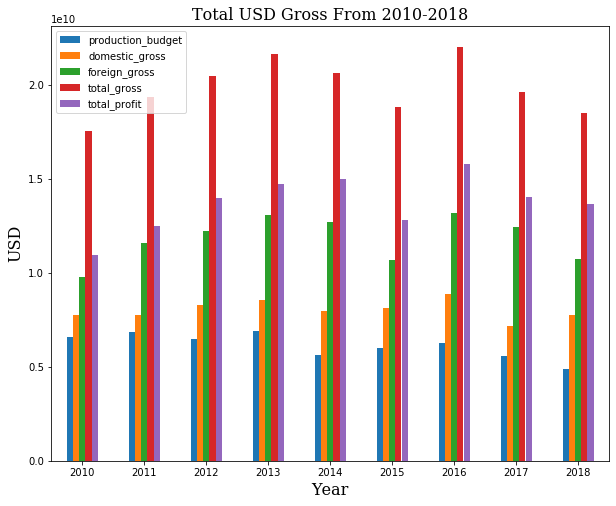

In [88]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
tots.plot(kind = "bar", figsize = (10,8))
plt.ylabel("USD", fontdict=font)
plt.xlabel("Year", fontdict=font)
plt.title("Total USD Gross From 2010-2018", fontdict=font);
plt.xticks(rotation=0)
plt.savefig('images/total_gross_2010_2018.png', bbox_inches = "tight");



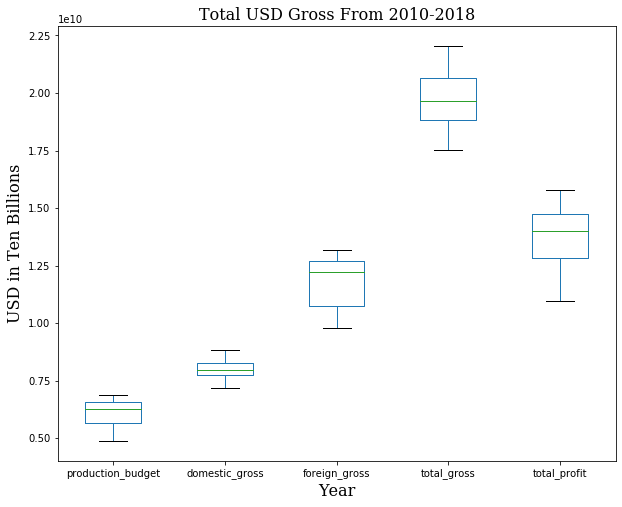

In [89]:
# Range of each category

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
tots.plot(kind = "box", figsize = (10,8))
plt.ylabel("USD in Ten Billions", fontdict=font)
plt.xlabel("Year", fontdict=font)
plt.title("Total USD Gross From 2010-2018", fontdict=font);
plt.savefig('images/total_gross_boxplot_2010_2018.png', bbox_inches = "tight");

In [45]:
median_df=df.groupby("year")["production_budget", "domestic_gross", "foreign_gross", "total_gross","total_profit"].agg("median")[:25]
mean_df=df.groupby("year")["production_budget", "domestic_gross", "foreign_gross", "total_gross","total_profit"].agg("mean")[:25]

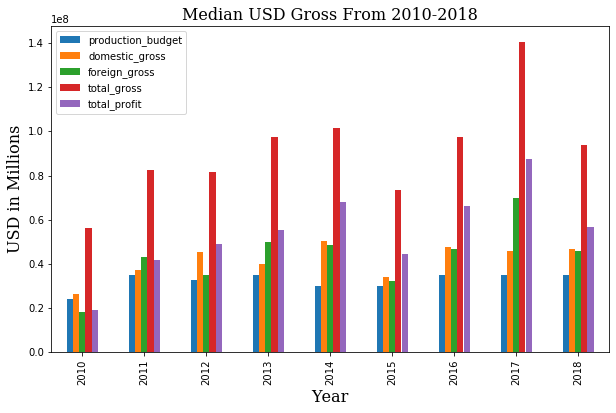

In [46]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
median_df.plot(kind = "bar", figsize = (10,6))
plt.ylabel("USD in Millions", fontdict=font)
plt.xlabel("Year", fontdict=font)
plt.title("Median USD Gross From 2010-2018", fontdict=font);
plt.savefig('images/avg_gross_2010_2018.png', bbox_inches = "tight");

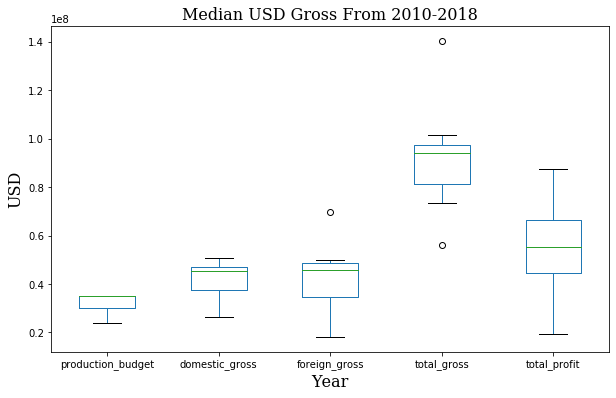

In [47]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
median_df.plot(kind = "box", figsize = (10,6))
plt.ylabel("USD", fontdict=font)
plt.xlabel("Year", fontdict=font)
plt.title("Median USD Gross From 2010-2018", fontdict=font);
plt.savefig('images/avg_gross_boxplot_2010_2018.png', bbox_inches = "tight");

In [48]:
median_df.describe()

,production_budget,domestic_gross,foreign_gross,total_gross,total_profit
count,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00
mean,3.238889e+07,4.161111e+07,4.322222e+07,9.166111e+07,5.428889e+07
std,3.806062e+06,7.831418e+06,1.420790e+07,2.328105e+07,1.917436e+07
min,2.400000e+07,2.620000e+07,1.810000e+07,5.610000e+07,1.920000e+07
25%,3.000000e+07,3.740000e+07,3.480000e+07,8.150000e+07,4.470000e+07
50%,3.500000e+07,4.550000e+07,4.570000e+07,9.400000e+07,5.540000e+07
75%,3.500000e+07,4.690000e+07,4.850000e+07,9.750000e+07,6.630000e+07
max,3.500000e+07,5.060000e+07,6.980000e+07,1.406000e+08,8.750000e+07


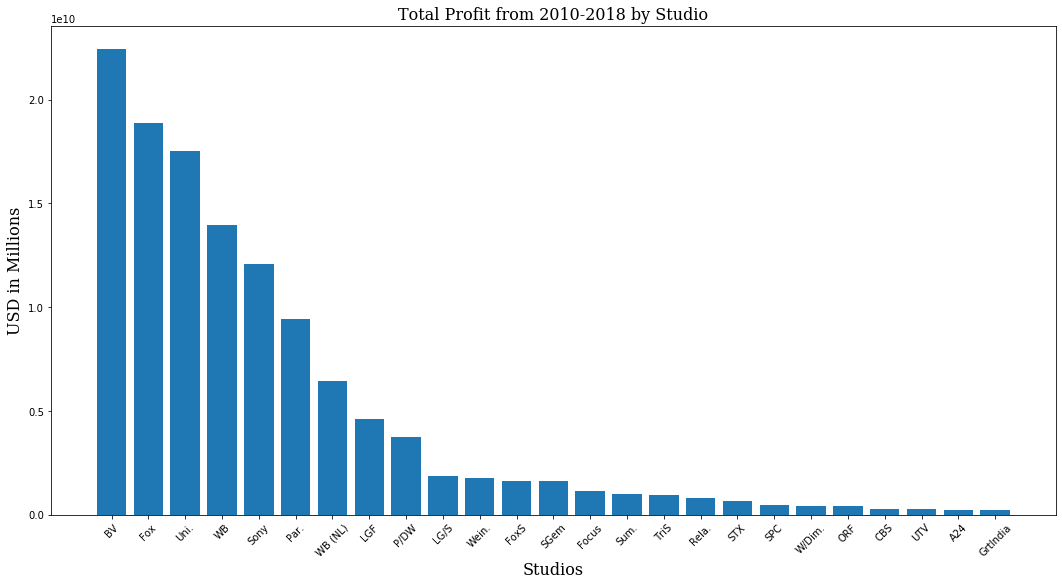

In [49]:
studio_df=df.groupby("studio")["domestic_gross", "foreign_gross", "total_gross","total_profit"].sum().sort_values(by="total_profit", ascending = False)[:25]
fig, ax = plt.subplots(figsize = (18,9))

x= studio_df.index
y= studio_df["total_profit"]
ax.bar(x,y, linewidth=1)
ax.set_title("Total Profit from 2010-2018 by Studio", fontdict=font)
ax.set_ylabel("USD in Millions", fontdict=font )
ax.set_xlabel("Studios", fontdict=font)
plt.xticks(rotation=45);
#plt.ticklabel_format(style='plain', axis='y')
plt.savefig('images/total_profit_2010_2018.png', bbox_inches = "tight");

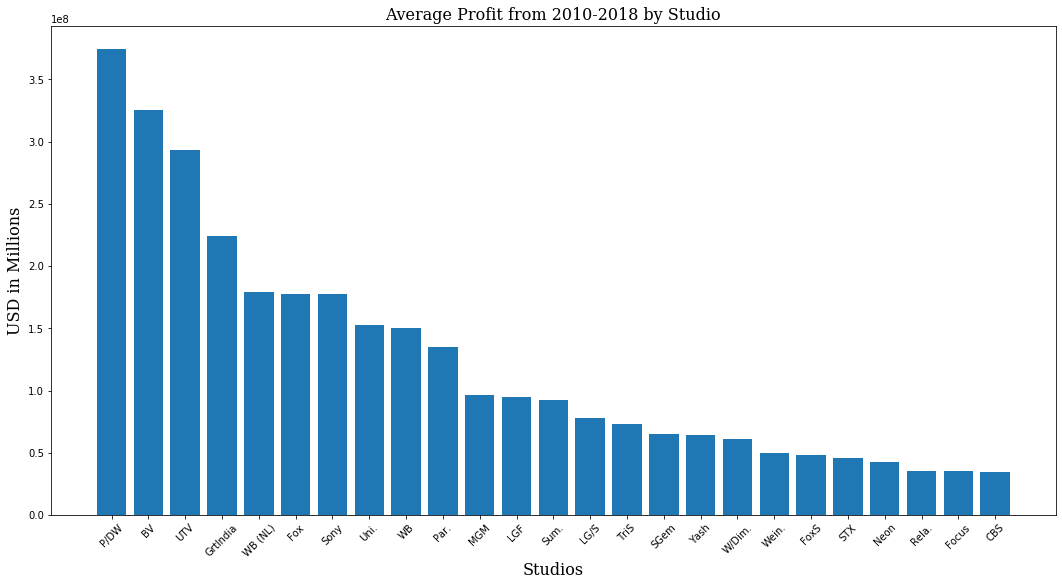

In [50]:
avg_studio_df=df.groupby("studio")["domestic_gross", "foreign_gross", "total_gross","total_profit"].agg("mean").sort_values(by="total_profit", ascending = False)[:25]
fig, ax = plt.subplots(figsize = (18,9))

x= avg_studio_df.index
y= avg_studio_df["total_profit"]
ax.bar(x,y, linewidth=1)
ax.set_title("Average Profit from 2010-2018 by Studio", fontdict=font)
ax.set_ylabel("USD in Millions", fontdict=font )
ax.set_xlabel("Studios", fontdict=font)
plt.xticks(rotation=45);
#plt.ticklabel_format(style='plain', axis='y')
plt.savefig('images/avg_total_profit_2010_2018.png', bbox_inches = "tight");

In [51]:
#df.set_index("title")
df.head(2)

,title,studio,domestic_gross,foreign_gross,year,original_language,popularity,release_date,vote_average,vote_count,production_budget,total_gross,total_profit
0,Toy Story 3,BV,415000000.0,652000000.0,2010,en,24.445,2010-06-17,7.7,8340,200000000,1.067000e+09,867000000.0
1,Inception,WB,292600000.0,535700000.0,2010,en,27.920,2010-07-16,8.3,22186,160000000,8.283000e+08,668300000.0


In [52]:
df.groupby(["year"])["studio"].value_counts(ascending = False)

year  studio     
2010  Uni.           13
      Fox            12
      WB             12
      LGF             9
      Par.            8
                     ..
2018  FoxS            1
      Global Road     1
      LG/S            1
      MGM             1
      VE              1
Name: studio, Length: 237, dtype: int64

In [53]:
#djb=df.groupby(["year"])["studio"].value_counts(ascending = False)
DJB=pd.DataFrame(df.groupby(["year"])["studio"].value_counts(ascending = False))
DJB.rename(columns={"studio":"num_movies"}, inplace = True)

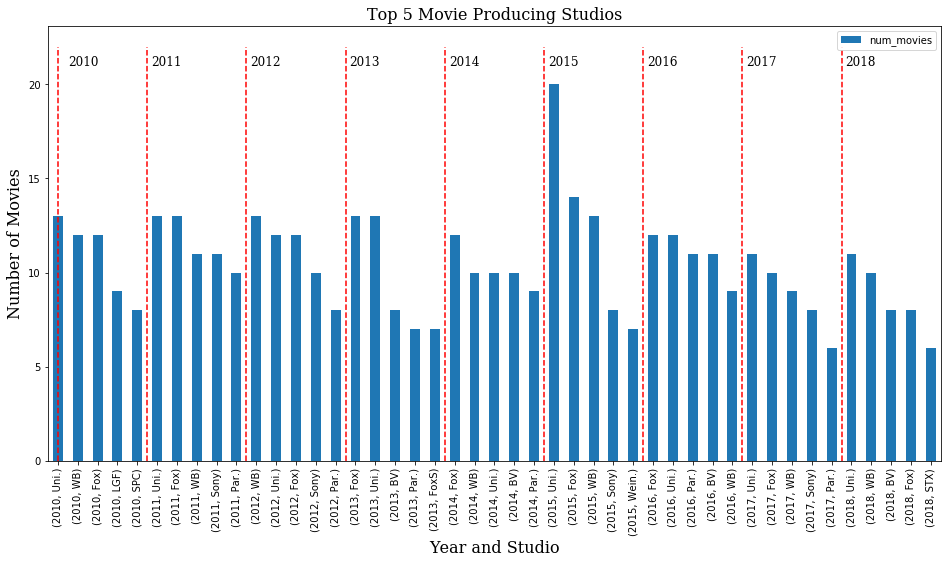

In [54]:
font4 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

top_5studio_per_year = DJB.groupby(level=[0]).apply(lambda x:x.groupby(level=[1]).sum().sort_values('num_movies',ascending=False).head(5))
top_5studio_per_year.plot(kind= "bar", figsize = (16,8))
# plt.bar(x = )
plt.title("Top 5 Movie Producing Studios", fontdict=font)
plt.xlabel("Year and Studio", fontdict=font)
plt.ylabel("Number of Movies", fontdict=font);
plt.vlines([0,4.5,9.5,14.5,19.5,24.5,29.5,34.5,39.5],0,22,color="red",linestyles="dashed");
plt.text(0.5,21,'2010',rotation=0, fontdict=font4)
plt.text(4.7,21,'2011',rotation=0, fontdict=font4)
plt.text(9.7,21,'2012',rotation=0, fontdict=font4)
plt.text(14.7,21,'2013',rotation=0, fontdict=font4)
plt.text(19.7,21,'2014',rotation=0, fontdict=font4)
plt.text(24.7,21,'2015',rotation=0, fontdict=font4)
plt.text(29.7,21,'2016',rotation=0, fontdict=font4)
plt.text(34.7,21,'2017',rotation=0, fontdict=font4)
plt.text(39.7,21,'2018',rotation=0, fontdict=font4)
plt.legend(loc = 1);
plt.savefig('images/top5_producers.png', bbox_inches = "tight");

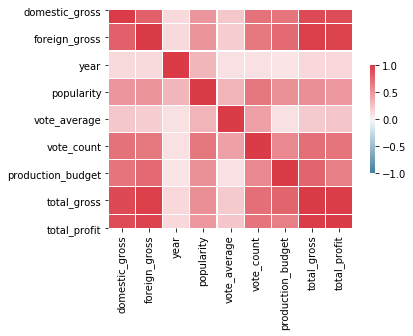

In [55]:
cmap = sns.diverging_palette(230, 10, as_cmap=True)
# Try scatter plot between domestic and foreign 
sns.heatmap(movie_db.corr(), cmap=cmap, vmin = -1, vmax=1, 
            center=0, linewidths=.1, square = True, cbar_kws={"shrink": .5});
plt.savefig('images/heatmap_movie_db.png', bbox_inches = "tight");

# Pixar/DreamWorks made the most money ...... but it is not the highest movie releasing making studio each year... what are they doing right? 
## Let's merge with tn to get more data. 

In [56]:
pdw=movie_db.loc[movie_db["studio"]== "P/DW"]

In [57]:
pdw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 2 to 445
Data columns (total 13 columns):
title                10 non-null object
studio               10 non-null object
domestic_gross       10 non-null float64
foreign_gross        10 non-null float64
year                 10 non-null int64
original_language    10 non-null object
popularity           10 non-null float64
release_date         10 non-null object
vote_average         10 non-null float64
vote_count           10 non-null int64
production_budget    10 non-null int64
total_gross          10 non-null float64
total_profit         10 non-null float64
dtypes: float64(6), int64(3), object(4)
memory usage: 1.1+ KB


In [58]:
# fig, ax = plt.subplots(figsize = (20,10))
# yearidx=top_5studio_per_year.reset_index()
# # ##sns.boxplot(x=xunit, y=var, data=df, order=order,palette=df[condition_column].map(palette_dir))
# davids_idea = sns.barplot(data = yearidx, x = "year", y = "num_movies", hue = "studio", palette = "tab10");
# # # # seaborn has this weird thing with "hue" that it will nest the bars and
# # # #   create weird spaces and thin bars -- might need to do a subplot and on matplotlib

In [59]:
pdw_movie_list=pdw.groupby(["year"])["title"].value_counts(ascending = False)

In [60]:
pdw_movie_list

year  title                             
2010  Dinner for Schmucks                   1
      How to Train Your Dragon              1
      Megamind                              1
      Shrek Forever After                   1
2011  Kung Fu Panda 2                       1
      Puss in Boots                         1
      Transformers: Dark of the Moon        1
2012  A Thousand Words                      1
      Madagascar 3: Europe's Most Wanted    1
      Rise of the Guardians                 1
Name: title, dtype: int64

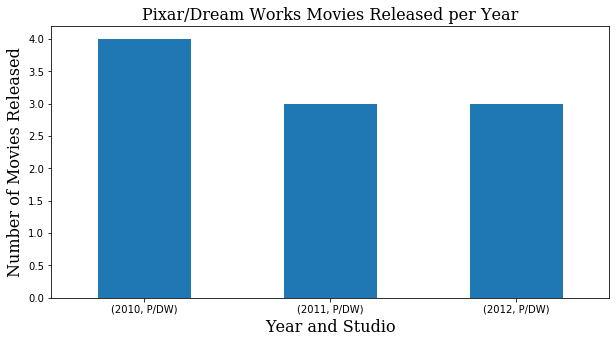

In [61]:
pdw_movies=pdw.groupby(["year"])["studio"].value_counts(ascending = False)
pdw_movies.plot(kind="bar", figsize = (10,5))
plt.xticks(rotation=0)
plt.ylabel("Number of Movies Released", fontdict=font)
plt.xlabel("Year and Studio", fontdict = font)
plt.title("Pixar/Dream Works Movies Released per Year", fontdict=font);
plt.savefig('images/pixar_wd_movies_released.png', bbox_inches = "tight");

# Recheck if total_profit is working

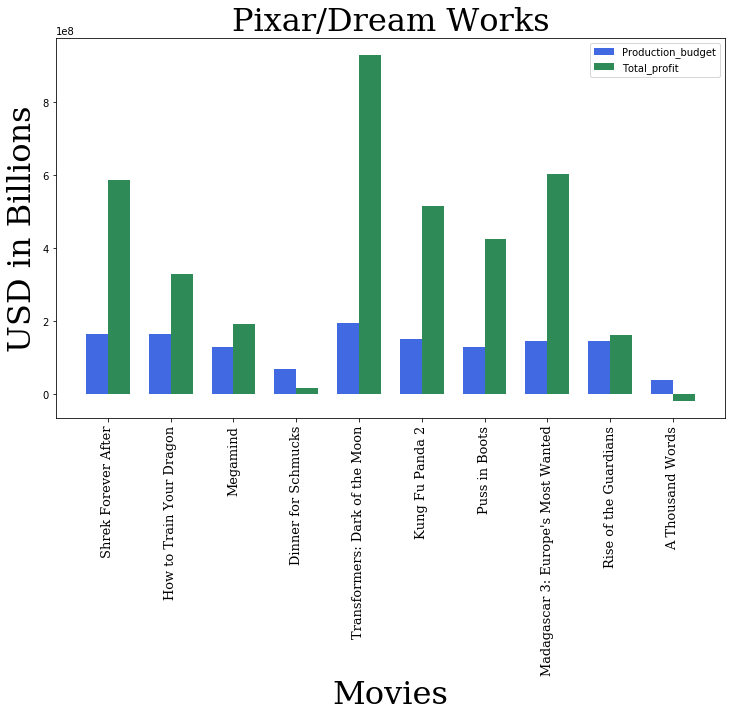

<Figure size 432x288 with 0 Axes>

In [62]:
font2 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 32,
        }

font3 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 13,
        }
N = 10
x = pdw['title']
y2 = pdw['total_profit']
y1 = pdw['production_budget']

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot()
budget = ax.bar(ind, y1, width, color='royalblue')
total = ax.bar(ind+width, y2, width, color='seagreen')

ax.set_ylabel('USD in Billions',fontdict = font2)
ax.set_title("Pixar/Dream Works", fontdict = font2)
ax.set_xticks(ind + width / 2)
plt.xticks(rotation = 90)
ax.set_xticklabels(x, fontdict = font3)
ax.set_xlabel("Movies", fontdict = font2)

ax.legend( (budget[0], total[0]), ('Production_budget', 'Total_profit') )

plt.show()
plt.savefig('images/pixar_dw_movies.png', bbox_inches = "tight");

In [63]:
bv=movie_db.loc[movie_db["studio"]== "BV"]

In [64]:
bv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 1308
Data columns (total 13 columns):
title                69 non-null object
studio               69 non-null object
domestic_gross       69 non-null float64
foreign_gross        69 non-null float64
year                 69 non-null int64
original_language    69 non-null object
popularity           69 non-null float64
release_date         69 non-null object
vote_average         69 non-null float64
vote_count           69 non-null int64
production_budget    69 non-null int64
total_gross          69 non-null float64
total_profit         69 non-null float64
dtypes: float64(6), int64(3), object(4)
memory usage: 7.5+ KB


In [65]:
bv["production_budget"]=bv["production_budget"].astype(float)

In [66]:
bv_movie_list=bv.groupby(["year"])["title"].value_counts(ascending = False)

In [67]:
bv_movie_list

year  title                             
2010  Oceans                                1
      Secretariat                           1
      Tangled                               1
      The Last Song                         1
      The Sorcerer's Apprentice             1
                                           ..
2018  Black Panther                         1
      Incredibles 2                         1
      Mary Poppins Returns                  1
      Solo: A Star Wars Story               1
      The Nutcracker and the Four Realms    1
Name: title, Length: 69, dtype: int64

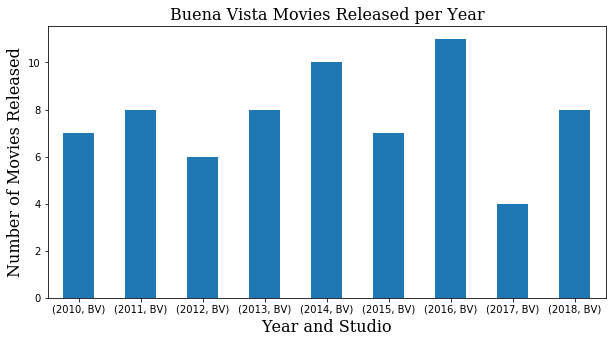

In [68]:
bv_movies=bv.groupby(["year"])["studio"].value_counts(ascending = False)
bv_movies.plot(kind="bar", figsize = (10,5))
plt.xticks(rotation=0)
plt.ylabel("Number of Movies Released", fontdict = font)
plt.title("Buena Vista Movies Released per Year", fontdict = font)
plt.xlabel("Year and Studio", fontdict = font);
plt.savefig('images/bv_movies_released.png', bbox_inches = "tight");

In [69]:
bv_25=bv.sort_values("total_profit", ascending = False)[:25]

In [70]:
bv_25.shape

(25, 13)

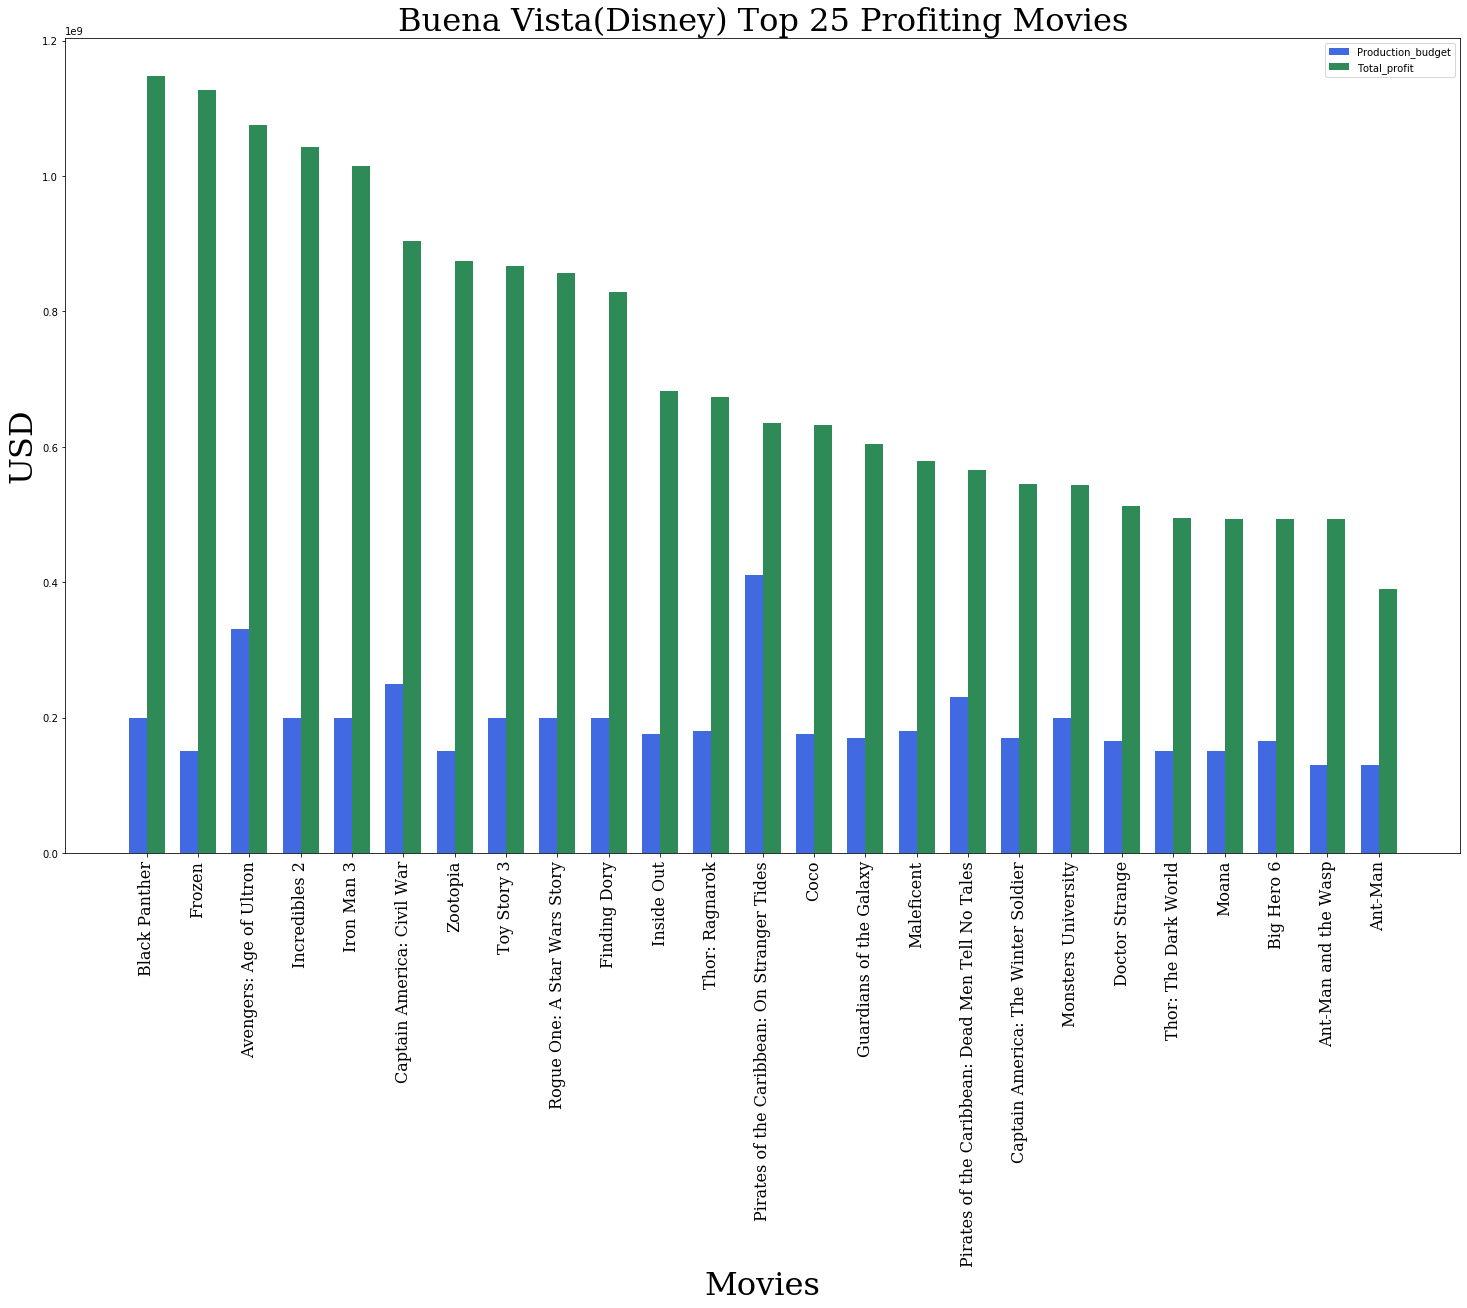

<Figure size 432x288 with 0 Axes>

In [71]:
font2 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 32,
        }

font3 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
N = 25
x = bv_25['title']
y2 = bv_25['total_profit']
y1 = bv_25['production_budget']

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111)
budget = ax.bar(ind, y1, width, color='royalblue')
total = ax.bar(ind+width, y2, width, color='seagreen')

ax.set_ylabel('USD', fontdict = font2)
ax.set_title("Buena Vista(Disney) Top 25 Profiting Movies", fontdict = font2)
ax.set_xticks(ind + width / 2)
plt.xticks(rotation = 90)
ax.set_xticklabels(x, fontdict = font3)
ax.set_xlabel("Movies", fontdict = font2)

ax.legend( (budget[0], total[0]), ('Production_budget', 'Total_profit') )

plt.show();
plt.savefig('images/bv_top25_movies.png', bbox_inches = "tight");

# Does the stuido of the movie maker matter? 

## At a glance, it seems like it does. Some studios perform horribly in the domestic market but do well in the foreign market. However, there are studios that perform great overall. 
### P/DW (i think thats Pixar/Dream Works and BV [Buena Vista](Subsidiaries of Walt Disney Company) perform really well. 

But in order to understand more, its cruail to examine the answers to the other questions:
- How many movies were released in a given year and who released it?
- Which movie made the most? how does the rating(popularity/vote_average) reflect that?
- Where is the money coming for --> domestic, foreign,
- What movies are bringing in the money and what features (genres, actors, directors, runtime) contribue to this.

In [72]:
pd.set_option('display.max_rows', 1000)
number_movies_studio=movie_db.groupby(['studio'])["title"].count().sort_values(ascending = False)

In [73]:
movie_db["popularity"].max()

80.773

In [74]:
# Find the titles released by Uni. in 2010 and find max total gross.
uni=movie_db.loc[movie_db["studio"] == "Uni."]

In [75]:
uni_movies=uni.groupby(["year"])["studio"].value_counts(ascending = False)

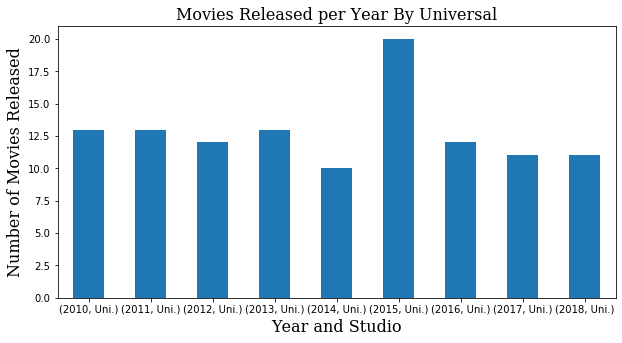

In [76]:
uni_movies.plot(kind="bar", figsize = (10,5))
plt.xticks(rotation=0)
plt.ylabel("Number of Movies Released", fontdict = font)
plt.title("Movies Released per Year By Universal", fontdict = font)
plt.xlabel("Year and Studio", fontdict = font);
plt.savefig('images/universal_movies_released.png', bbox_inches = "tight");

In [77]:
uni_25=uni.sort_values("total_profit", ascending = False)[:25]

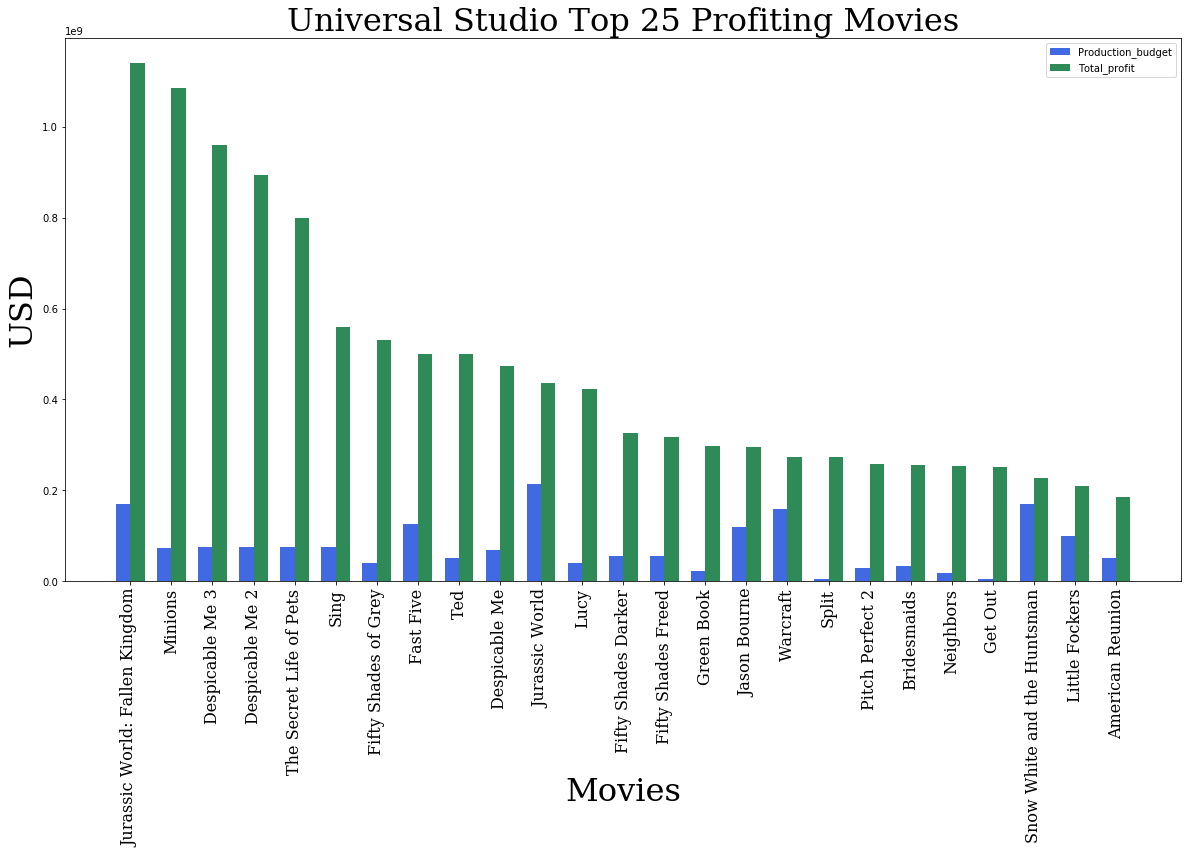

<Figure size 432x288 with 0 Axes>

In [78]:

N = 25
x = uni_25['title']
y2 = uni_25['total_profit']
y1 = uni_25['production_budget']

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
budget = ax.bar(ind, y1, width, color='royalblue')
total = ax.bar(ind+width, y2, width, color='seagreen')

ax.set_ylabel('USD', fontdict = font2)
ax.set_title("Universal Studio Top 25 Profiting Movies", fontdict = font2)
ax.set_xticks(ind + width / 2)
plt.xticks(rotation = 90)
ax.set_xticklabels(x, fontdict = font3)
ax.set_xlabel("Movies", fontdict = font2, labelpad = -70)

ax.legend( (budget[0], total[0]), ('Production_budget', 'Total_profit') )

plt.show();
plt.savefig('images/universal_top25_movies.png', bbox_inches = "tight");

In [79]:
popularity_max=movie_db.loc[movie_db["popularity"]== 80.773]
vote_count_max=movie_db.loc[movie_db["vote_count"] == 22186]
gross_max = movie_db.loc[movie_db["total_gross"] == 1405400000.0]
profit_max = movie_db.loc[movie_db["total_profit"] == 1147000000.0]
best_performing = vote_count_max.append(gross_max)
best_performing = best_performing.append(profit_max)
best_performing = best_performing.append(popularity_max)
best_performing.set_index("title", inplace = True)
bp_money = best_performing[["production_budget","total_gross", "total_profit"]]
bp_pop= best_performing[["popularity"]]
bp_sub = best_performing[["vote_average"]]


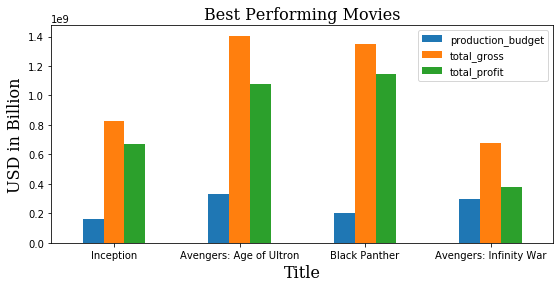

In [80]:
bp_money.plot(kind="bar", figsize = (9,4))
plt.title("Best Performing Movies", fontdict=font3)
plt.xlabel("Title", fontdict=font3)
plt.ylabel("USD in Billion", fontdict=font3)
plt.xticks(rotation = 0);
plt.savefig('images/best_performing_movies.png', bbox_inches = "tight");

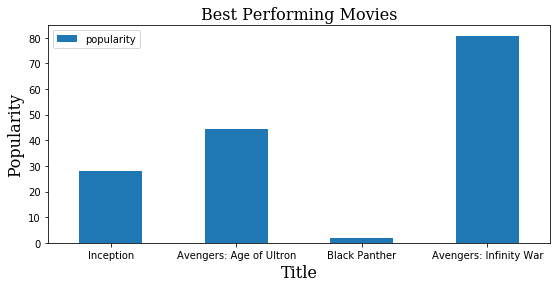

In [81]:
bp_pop.plot(kind="bar", figsize = (9,4))
plt.title("Best Performing Movies", fontdict=font3)
plt.xlabel("Title", fontdict=font3)
plt.ylabel("Popularity", fontdict=font3)
plt.xticks(rotation = 0);
plt.savefig('images/bp_popularity.png', bbox_inches = "tight");

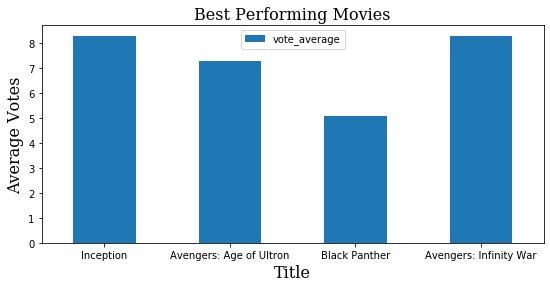

In [82]:
bp_sub.plot(kind="bar", figsize = (9,4))
plt.title("Best Performing Movies", fontdict=font3)
plt.xlabel("Title", fontdict=font3)
plt.ylabel("Average Votes", fontdict=font3)
plt.xticks(rotation = 0);
plt.savefig('images/bp_avg_votes.png', bbox_inches = "tight");

In [83]:
best_performing

,studio,domestic_gross,foreign_gross,year,original_language,popularity,release_date,vote_average,vote_count,production_budget,total_gross,total_profit
title,,,,,,,,,,,,
Inception,WB,292600000.0,535700000.0,2010,en,27.920,2010-07-16,8.3,22186,160000000,8.283000e+08,6.683000e+08
Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,en,44.383,2015-05-01,7.3,13457,330600000,1.405400e+09,1.074800e+09
Black Panther,BV,700100000.0,646900000.0,2018,en,2.058,2011-01-18,5.1,11,200000000,1.347000e+09,1.147000e+09
Avengers: Infinity War,BV,678800000.0,1369.5,2018,en,80.773,2018-04-27,8.3,13948,300000000,6.788014e+08,3.788014e+08
